### 将列式数据变成二维的交叉形式，便于分析，叫做重塑或者透视

1. 使用统计得到多维度指标数据
2. 使用unstack实现数据二维透视
3. 使用pivot简化透视

In [7]:
import pandas as pd
import numpy as np
%matplotlib inline

In [4]:
data = pd.read_csv(r'C:\Users\86158\scikit_learn\pollution.csv')
data['month'] = data['date'].str[:7]
data.head(5)

,date,pollution,dew,temp,press,wnd_dir,wnd_spd,snow,rain,month
0,2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,SE,1.79,0,0,2010-01
1,2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,SE,2.68,0,0,2010-01
2,2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,SE,3.57,0,0,2010-01
3,2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,SE,5.36,1,0,2010-01
4,2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,SE,6.25,2,0,2010-01


In [3]:
data['month'] = data['date'].str[:7]

In [18]:
group_df = data.groupby(['snow','wnd_dir'])['pollution'].agg(pollution_mean=np.mean)
group_df

pollution_mean
snow wnd_dir                
0    NE            85.510167
     NW            66.543814
     SE           105.336011
     cv           120.006751
1    NE           254.250000
...                      ...
23   cv           115.000000
24   cv            61.000000
25   cv            53.000000
26   NW            71.000000
27   NW            72.000000

[76 rows x 1 columns]

In [19]:
# 使用unstack实现数据二维透视
stack_df = group_df.unstack()
stack_df

pollution_mean                                    
wnd_dir             NE          NW          SE          cv
snow                                                      
0            85.510167   66.543814  105.336011  120.006751
1           254.250000  143.818182  146.975610  164.000000
2           187.500000  149.000000  149.035714  165.555556
3           165.666667  168.500000  103.863636  235.000000
4            73.000000  169.200000  123.352941  161.428571
5           119.333333  196.750000  133.529412  118.333333
6           123.666667  149.750000  129.882353  289.000000
7            55.000000  201.000000  118.600000  264.333333
8           172.500000  117.333333  136.833333  108.000000
9            61.000000  121.500000  115.000000   65.000000
10          146.000000  113.333333  106.428571  119.500000
11          150.000000  139.500000   75.666667         NaN
12           76.000000  200.000000   91.250000         NaN
13          132.000000  152.500000   89.666667   82.000000
14                 NaN  241.000000   94.000000  118.000000
15                 NaN  240.000000  105.750000         NaN
16                 NaN  231.000000  109.500000         NaN
17                 NaN  213.000000  115.000000         NaN
18                 NaN  210.000000  121.000000         NaN
19                 NaN  197.000000   91.666667         NaN
20                 NaN         NaN   91.333333         NaN
21                 NaN         NaN   94.500000         NaN
22                 NaN         NaN   87.000000         NaN
23                 NaN         NaN   70.000000  115.000000
24                 NaN         NaN         NaN   61.000000
25                 NaN         NaN         NaN   53.000000
26                 NaN   71.000000         NaN         NaN
27                 NaN   72.000000         NaN         NaN

<AxesSubplot:xlabel='snow'>

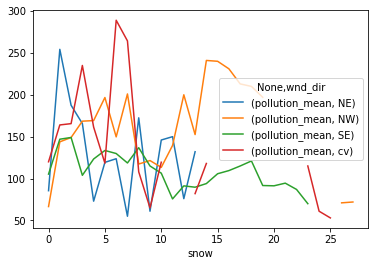

In [20]:
stack_df.plot()

In [21]:
# stack于unstack是互逆操作
stack_df.stack()

pollution_mean
snow wnd_dir                
0    NE            85.510167
     NW            66.543814
     SE           105.336011
     cv           120.006751
1    NE           254.250000
...                      ...
23   cv           115.000000
24   cv            61.000000
25   cv            53.000000
26   NW            71.000000
27   NW            72.000000

[76 rows x 1 columns]

In [22]:
# 使用pivot简化透视:相当于对df使用set_index创建分层索引，然后调用unstack
reindex_df = group_df.reset_index()
reindex_df

,snow,wnd_dir,pollution_mean
0,0,NE,85.510167
1,0,NW,66.543814
2,0,SE,105.336011
3,0,cv,120.006751
4,1,NE,254.250000
...,...,...,...
71,23,cv,115.000000
72,24,cv,61.000000
73,25,cv,53.000000
74,26,NW,71.000000


In [25]:
pivot_df = reindex_df.pivot('snow','wnd_dir','pollution_mean')
pivot_df

wnd_dir,NE,NW,SE,cv
snow,,,,
0,85.510167,66.543814,105.336011,120.006751
1,254.250000,143.818182,146.975610,164.000000
2,187.500000,149.000000,149.035714,165.555556
3,165.666667,168.500000,103.863636,235.000000
4,73.000000,169.200000,123.352941,161.428571
5,119.333333,196.750000,133.529412,118.333333
6,123.666667,149.750000,129.882353,289.000000
7,55.000000,201.000000,118.600000,264.333333
8,172.500000,117.333333,136.833333,108.000000


<AxesSubplot:xlabel='snow'>

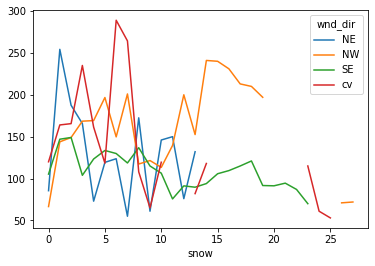

In [26]:
pivot_df.plot()

### stack：DataFrame.stack(level=-1,dropna=True) 将index转化成columns

level=-1代表多层索引最内层，可以通过=0，1，2指定多层索引

### pivot：DataFrame.pivot(index=None,columns=None,value=None)
指定index，columns和values实现二维透视